<a href="https://colab.research.google.com/github/NerusuSahithi011/NLP/blob/main/nlplab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
assignment 4.4

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data = {
    'tweet': [
        "I hate this phone, worst experience ever!",
        "This service is terrible and slow",
        "I am very disappointed with the product",
        "Absolutely love this! Amazing experience",
        "Great service and friendly staff"
    ],
    'sentiment': ['negative', 'negative', 'negative', 'positive', 'positive']
}

df = pd.DataFrame(data)
df


,tweet,sentiment
0,"I hate this phone, worst experience ever!",negative
1,This service is terrible and slow,negative
2,I am very disappointed with the product,negative
3,Absolutely love this! Amazing experience,positive
4,Great service and friendly staff,positive


In [4]:
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)     # remove URLs
    text = re.sub(r'@\w+', '', text)         # remove mentions
    text = re.sub(r'#\w+', '', text)         # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)     # remove punctuation & numbers

    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
df


,tweet,sentiment,cleaned_tweet
0,"I hate this phone, worst experience ever!",negative,hate phone worst experience ever
1,This service is terrible and slow,negative,service terrible slow
2,I am very disappointed with the product,negative,disappointed product
3,Absolutely love this! Amazing experience,positive,absolutely love amazing experience
4,Great service and friendly staff,positive,great service friendly staff


In [5]:
negative_tweets = df[df['sentiment'] == 'negative']['cleaned_tweet']
negative_tweets


,cleaned_tweet
0,hate phone worst experience ever
1,service terrible slow
2,disappointed product


In [6]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(negative_tweets)

feature_names = tfidf.get_feature_names_out()


In [7]:
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

tfidf_df = pd.DataFrame({
    'term': feature_names,
    'score': tfidf_scores
})

top_terms = tfidf_df.sort_values(by='score', ascending=False).head(10)
top_terms


,term,score
0,disappointed,0.707107
5,product,0.707107
7,slow,0.577350
8,terrible,0.577350
6,service,0.577350
1,ever,0.447214
4,phone,0.447214
3,hate,0.447214
2,experience,0.447214
9,worst,0.447214


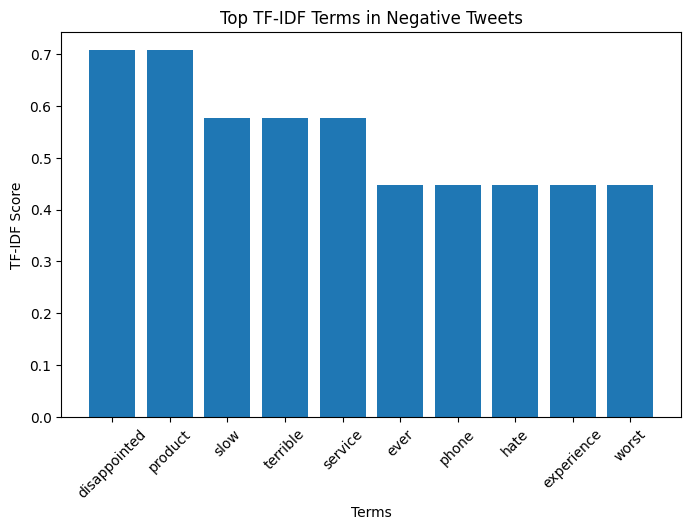

In [8]:
plt.figure(figsize=(8,5))
plt.bar(top_terms['term'], top_terms['score'])
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.title("Top TF-IDF Terms in Negative Tweets")
plt.xticks(rotation=45)
plt.show()


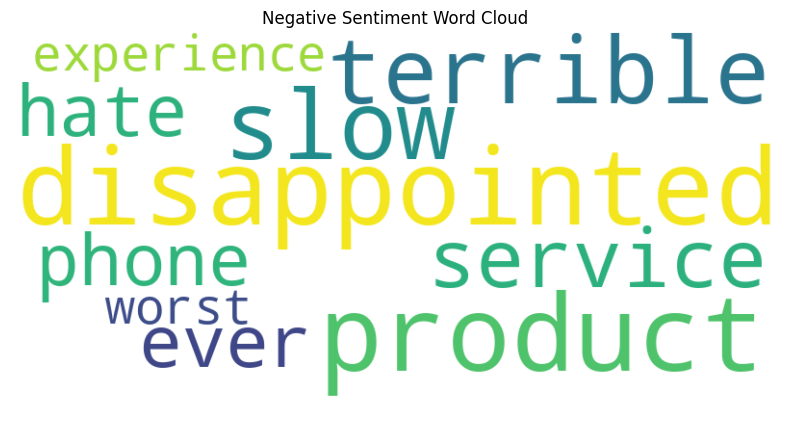

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white') \
            .generate_from_frequencies(dict(zip(top_terms['term'], top_terms['score'])))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()
